In [1]:
ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 5897-45E0

 c:\Users\sanghui\Desktop\toyproject\zerobase\zerobase_machine_learning\deeplearning ���͸�

2021-12-15  ���� 01:39    <DIR>          .
2021-12-15  ���� 01:39    <DIR>          ..
2021-12-06  ���� 01:29            88,866 32 movie_recommend.ipynb
2021-12-06  ���� 02:55            68,358 33 good books recommendation.ipynb
2021-12-06  ���� 03:43           716,022 34 Basic of DeepLearning.ipynb
2021-12-07  ���� 12:55           541,603 34-2 xor.ipynb
2021-12-07  ���� 03:08            34,332 35. iris.ipynb
2021-12-13  ���� 09:56           151,370 35-2 mnist.ipynb
2021-12-13  ���� 09:56            59,766 36 cnn.ipynb
2021-12-09  ���� 01:39           965,924 37 opencv.ipynb
2021-12-14  ���� 04:18           518,046 43. basic.ipynb
2021-12-15  ���� 11:27             4,630 44.mask man.ipynb
2021-12-14  ���� 08:27            29,324 basic2.ipynb
2021-12-10  ���� 06:33               314 canny_test.py
2021-12-09  ���� 05:54             1,20

In [2]:
ls "./mask_data/"

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 5897-45E0

 c:\Users\sanghui\Desktop\toyproject\zerobase\zerobase_machine_learning\deeplearning\mask_data ���͸�

2021-12-15  ���� 01:42    <DIR>          .
2021-12-15  ���� 01:42    <DIR>          ..
2021-12-15  ���� 01:37       346,345,728 archive (2).zip
2021-12-15  ���� 01:42    <DIR>          Face Mask Dataset
               1�� ����         346,345,728 ����Ʈ
               3�� ���͸�  815,686,623,232 ����Ʈ ����


In [3]:
import zipfile

content_zip = zipfile.ZipFile("C:/Users/sanghui/Desktop/toyproject/zerobase/zerobase_machine_learning/deeplearning/mask_data/archive (2).zip")
content_zip.extractall("./mask_data")

content_zip.close()

In [4]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
path = "./mask_data/Face Mask Dataset/"
dataset = {"image_path": [], "mask_status": [], "where": []}

for where in os.listdir(path):
    for status in os.listdir(path + "/" + where):
        for image in glob.glob(path + where + "/" + status + "/" + "*.png"):
            dataset['image_path'].append(image)
            dataset['mask_status'].append(status)
            dataset['where'].append(where)

In [7]:
dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,./mask_data/Face Mask Dataset/Test/WithMask\11...,WithMask,Test
1,./mask_data/Face Mask Dataset/Test/WithMask\11...,WithMask,Test
2,./mask_data/Face Mask Dataset/Test/WithMask\11...,WithMask,Test
3,./mask_data/Face Mask Dataset/Test/WithMask\12...,WithMask,Test
4,./mask_data/Face Mask Dataset/Test/WithMask\13...,WithMask,Test


With Mask : 5909
Without Mask : 5883


<AxesSubplot:xlabel='mask_status', ylabel='count'>

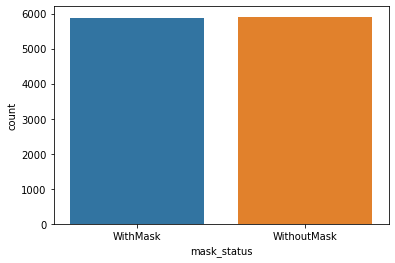

In [8]:
print(f'With Mask : {dataset.value_counts("mask_status")[0]}')
print(f'Without Mask : {dataset.value_counts("mask_status")[1]}')

sns.countplot(x=dataset['mask_status'])

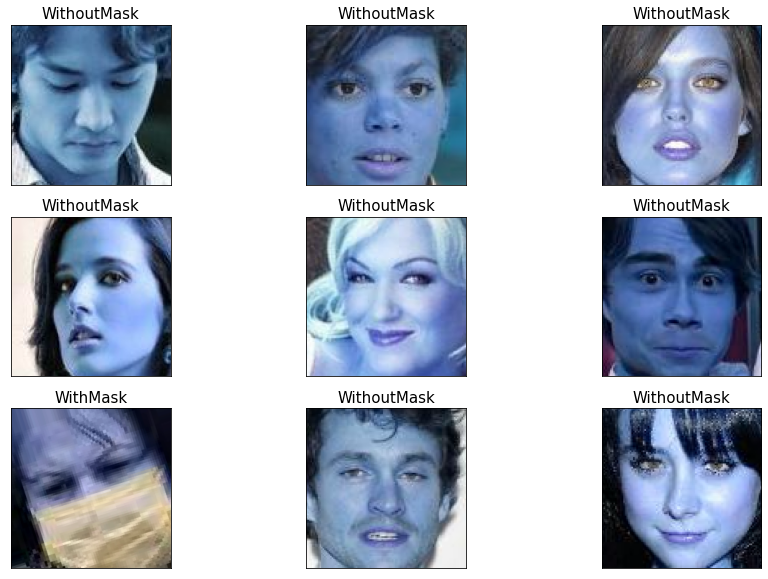

In [9]:
import cv2

plt.figure(figsize=(15, 10))
for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.imread(dataset.loc[random, "image_path"]))
    plt.title(dataset.loc[random, "mask_status"], size=15)
    plt.xticks([])
    plt.yticks([])
plt.show()


In [10]:
train_df = dataset[dataset['where']=='Train']
test_df = dataset[dataset['where']=='Test']
valid_df = dataset[dataset['where'] == 'Validation']

train_df.head(5)

,image_path,mask_status,where
992,./mask_data/Face Mask Dataset/Train/WithMask\1...,WithMask,Train
993,./mask_data/Face Mask Dataset/Train/WithMask\1...,WithMask,Train
994,./mask_data/Face Mask Dataset/Train/WithMask\1...,WithMask,Train
995,./mask_data/Face Mask Dataset/Train/WithMask\1...,WithMask,Train
996,./mask_data/Face Mask Dataset/Train/WithMask\1...,WithMask,Train


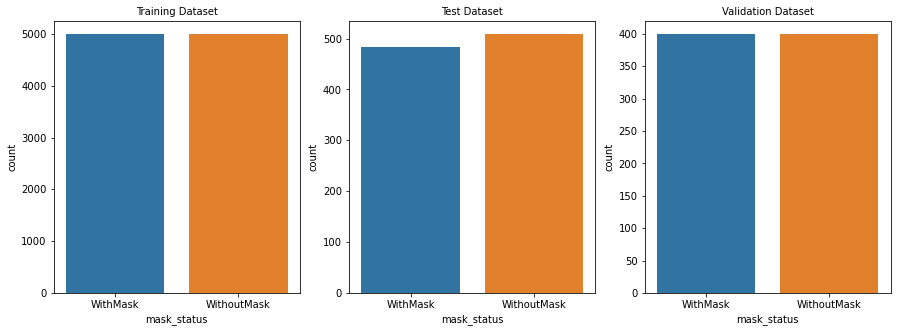

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x=train_df['mask_status'])
plt.title('Training Dataset', size=10)

plt.subplot(1, 3, 2)
sns.countplot(x=test_df['mask_status'])
plt.title('Test Dataset', size=10)

plt.subplot(1, 3, 3)
sns.countplot(x=valid_df['mask_status'])
plt.title('Validation Dataset', size=10)

plt.show()

In [12]:
train_df = train_df.reset_index().drop('index', axis=1)
train_df.head()

,image_path,mask_status,where
0,./mask_data/Face Mask Dataset/Train/WithMask\1...,WithMask,Train
1,./mask_data/Face Mask Dataset/Train/WithMask\1...,WithMask,Train
2,./mask_data/Face Mask Dataset/Train/WithMask\1...,WithMask,Train
3,./mask_data/Face Mask Dataset/Train/WithMask\1...,WithMask,Train
4,./mask_data/Face Mask Dataset/Train/WithMask\1...,WithMask,Train


In [13]:
data = []
image_size = 150

for i in range(len(train_df)):
    img_array = cv2.imread(train_df['image_path'][i], cv2.IMREAD_GRAYSCALE)
    new_image_array = cv2.resize(img_array, (image_size, image_size))

    if train_df['mask_status'][i] == 'WithMask':
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])


In [14]:
data[0]

[array([[238, 238, 238, ..., 199, 199, 199],
        [238, 238, 238, ..., 197, 197, 197],
        [237, 237, 238, ..., 194, 194, 195],
        ...,
        [236, 236, 236, ..., 151, 151, 152],
        [235, 235, 235, ..., 151, 152, 152],
        [235, 235, 235, ..., 151, 152, 152]], dtype=uint8),
 1]

In [15]:
np.random.shuffle(data)

In [16]:
data[0]

[array([[ 58,  57,  57, ..., 252, 251, 251],
        [ 57,  56,  56, ..., 252, 251, 251],
        [ 55,  56,  58, ..., 251, 251, 251],
        ...,
        [136, 128, 133, ..., 163, 154, 147],
        [145, 136, 138, ..., 160, 143, 129],
        [146, 138, 141, ..., 148, 127, 112]], dtype=uint8),
 0]

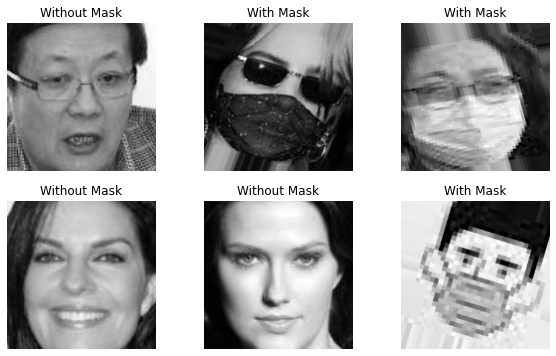

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for row in range(2):
    for col in range(3):
        image_index = row * 100 + col

        ax[row, col].axis('off')
        ax[row, col].imshow(data[image_index][0], cmap='gray')

        if data[image_index][1] == 0:
            ax[row, col].set_title('Without Mask')
        else:
            ax[row, col].set_title('With Mask')

In [18]:
X = []
y = []

for image in data:
    X.append(image[0])
    y.append(image[1])

X = np.array(X)
y = np.array(y)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [22]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(150,150,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [23]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
X_train = X_train.reshape(-1, 150,150,1)
X_val = X_val.reshape(-1, 150, 150, 1)

In [25]:
history = model.fit(X_train, y_train, epochs=4, batch_size=32)

Epoch 1/4
250/250 [==============================] - 136s 543ms/step - loss: 41.3182 - accuracy: 0.8879
Epoch 2/4
250/250 [==============================] - 135s 541ms/step - loss: 0.0784 - accuracy: 0.9724
Epoch 3/4
250/250 [==============================] - 132s 530ms/step - loss: 0.0582 - accuracy: 0.9793
Epoch 4/4
250/250 [==============================] - 132s 529ms/step - loss: 0.0330 - accuracy: 0.9885


In [26]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 5s 82ms/step - loss: 0.1242 - accuracy: 0.9680


[0.12417042255401611, 0.9679999947547913]

In [29]:
prediction = (model.predict(X_val) > 0.5).astype('int32')

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1030
           1       0.96      0.97      0.97       970

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[995  35]
 [ 29 941]]


In [30]:
wrong_result = []

for n in range(0, len(y_val)):
    if prediction[n] != y_val[n]:
        wrong_result.append(n)

len(wrong_result)

64

C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


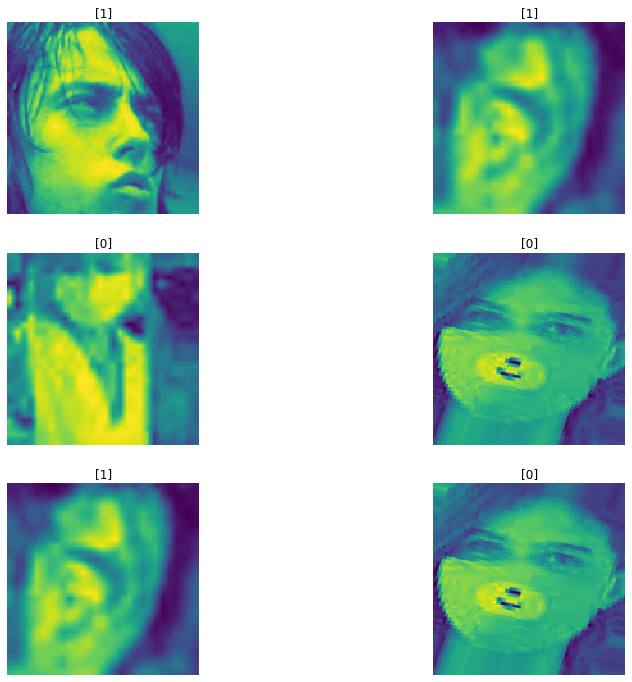

In [31]:
import random

samples = random.choices(population=wrong_result, k=6)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(3, 2, idx + 1)
    plt.imshow(X_val[n].reshape(150,150), interpolation='nearest')
    plt.title(prediction[n])
    plt.axis('off')

plt.show()